In [1]:
import rastereasy

# Dealing with shapefiles, ROI, ...

## 1) Read shapefile

Two main functions : `rastereasy.shpfiles.shp2raster` and `rastereasy.shpfiles.shp2geoim`

In [2]:
help(rastereasy.shpfiles.shp2raster)
help(rastereasy.shpfiles.shp2geoim)

Help on function shp2raster in module rastereasy.rastereasy:

shp2raster(shapefile_path, dest_name, attribute='code', resolution=10, nodata=0)
    Convert a shapefile to a GeoTIFF raster file.

    Parameters
    ----------
    shapefile_path : str
        Path to the input shapefile.
    dest_name : str
        Path to save the output raster file.
    attribute : str, optional
        Attribute field in the shapefile to assign values to each pixel.
        Default is 'code'.
    resolution : float, optional
        Spatial resolution of the output raster in meters/degrees.
        Default is 10.
    nodata : int or float, optional
        Value to assign to areas outside the shapes.
        Default is 0.

    Notes
    -----
    - The `shapefile_path` should be the full path to a shapefile (.shp) on the disk.
    - To get the attributes of a shapefile, see :meth:`shpfiles.get_shapefile_attributes`
    - The output raster will be written in GeoTIFF format to the path specified by `dest

## 2) Convert shapefile to tif

In [3]:
shapefile_path = './data/demo/data_shp/Roi_G5.shp'
rastereasy.shpfiles.shp2raster(shapefile_path,'./data/results/shp2raster/raster5m.tif',resolution=5)
rastereasy.shpfiles.shp2raster(shapefile_path,'./data/results/shp2raster/raster10m.tif',resolution=10)


## 2) Import as Geoimage

- Size of the image:
   - Rows (height): 3649
   - Cols (width): 5097
   - Bands: 1
- Spatial resolution: 5.000057261870794  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60953547, -2.57061505)
- Driver: GTiff
- Data type: int32
- Projection system: EPSG:32630
- Nodata: 0.0

- Given names for spectral bands: 
   {'1': 1}


- Size of the image:
   - Rows (height): 1824
   - Cols (width): 2548
   - Bands: 1
- Spatial resolution: 10.002076869605746  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60951283, -2.57058196)
- Driver: GTiff
- Data type: int32
- Projection system: EPSG:32630
- Nodata: 0.0

- Given names for spectral bands: 
   {'1': 1}


[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


<Figure size 640x480 with 0 Axes>

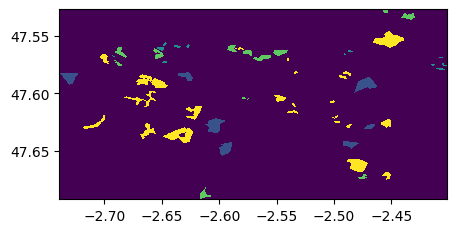

<Figure size 640x480 with 0 Axes>

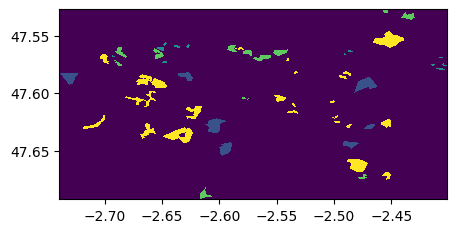

In [4]:
raster10m=rastereasy.Geoimage('./data/results/shp2raster/raster10m.tif')
raster5m=rastereasy.Geoimage('./data/results/shp2raster/raster5m.tif')
raster5m.info()
raster10m.info()
print(raster10m.unique())
print(raster5m.unique())
raster10m.visu()
raster5m.visu()

## 3) Convert shapefile to geoimage

In [5]:
georaster5=rastereasy.shpfiles.shp2geoim(shapefile_path,resolution=5)
georaster10=rastereasy.shpfiles.shp2geoim(shapefile_path,resolution=10)

<Figure size 640x480 with 0 Axes>

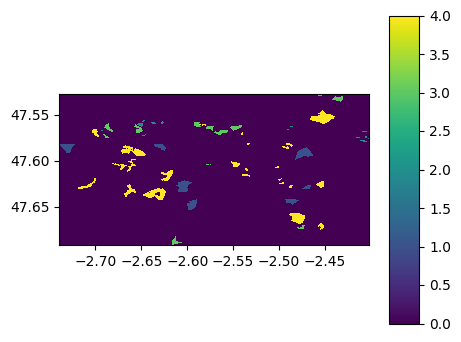

<Figure size 640x480 with 0 Axes>

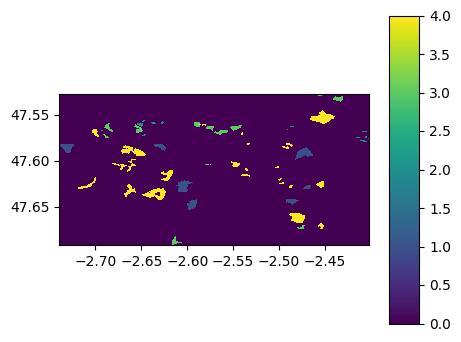

In [6]:
georaster5.visu(colorbar=True)    
georaster10.visu(colorbar=True)
georaster5.save('./data/results/shp2raster/raster5m_fromgeoraster.tif')
georaster10.save('./data/results/shp2raster/raster10m_fromgeoraster.tif')


In [7]:
G5_B2=rastereasy.Geoimage('./data/demo/tostack/G5_B2.tif')
G5_B3=rastereasy.Geoimage('./data/demo/tostack/G5_B3.tif')
G5_B4=rastereasy.Geoimage('./data/demo/tostack/G5_B4.tif')
G5_B8=rastereasy.Geoimage('./data/demo/tostack/G5_B8.tif')
ROI_g5=rastereasy.Geoimage('./data/demo/data_shp/ROI_g5.tif')

<Figure size 640x480 with 0 Axes>

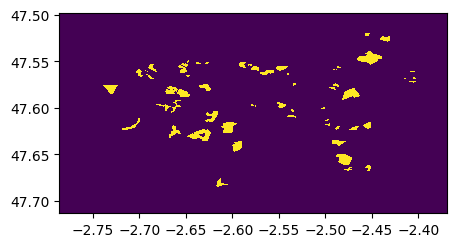

In [8]:
ROI_g5.visu()

## 4) Select interesting areas with `extract_from_shapefile`

### 1) Without modifying the image

Read a stack (for the example. `im` can be an image)

In [9]:
im=rastereasy.Geoimage('./data/demo/tostack/G5_B2.tif')
im_stack = im.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B3.tif'),reformat_names=True)
im_stack = im_stack.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B4.tif'),reformat_names=True)
im_stack = im_stack.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B8.tif'),reformat_names=True)
im_stack.info()

- Size of the image:
   - Rows (height): 2370
   - Cols (width): 3144
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60615500, -2.57780166)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4}




In [10]:
keep_size=True
value=3
ime=im_stack.extract_from_shapefile(shapefile_path,value,keep_size=keep_size)
ime.info()


- Size of the image:
   - Rows (height): 2370
   - Cols (width): 3144
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60615500, -2.57780166)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630
- Nodata: 0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4}




<Figure size 640x480 with 0 Axes>

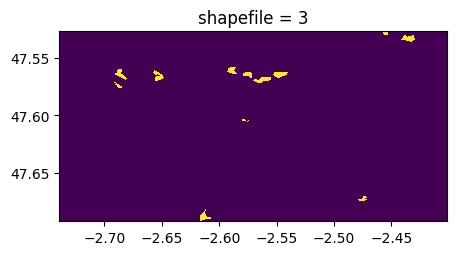

<Figure size 640x480 with 0 Axes>

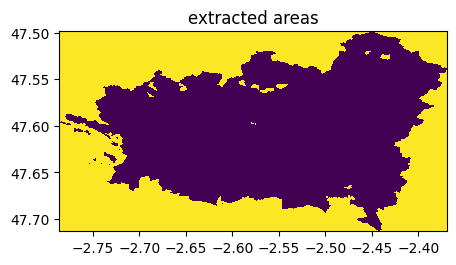

In [11]:
(rastereasy.shpfiles.shp2geoim(shapefile_path,resolution=im.resolution)==value).visu(title='shapefile = %d'%value)
if keep_size is True:
    ((ime-im)==0).visu(1,title='extracted areas')
else:
    ime,imc = rastereasy.extract_common_areas(ime,im,resolution=None)
    ((ime-imc)==0).visu(1,title='extracted areas')


### 2) With modifying the image (option `inplace=True`)

- Size of the image:
   - Rows (height): 2370
   - Cols (width): 3144
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60615500, -2.57780166)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4}


- Size of the image:
   - Rows (height): 1824
   - Cols (width): 2548
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60943270, -2.57056349)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630
- Nodata: 0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4}




<Figure size 640x480 with 0 Axes>

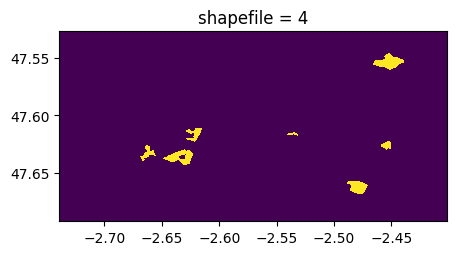

<Figure size 640x480 with 0 Axes>

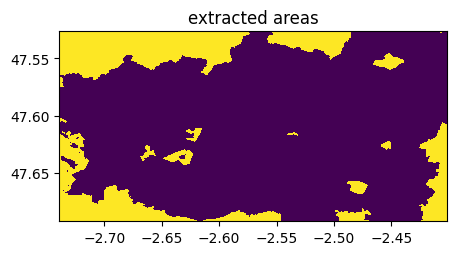

In [12]:
keep_size=False
value=4

#Read a stack
im=rastereasy.Geoimage('./data/demo/tostack/G5_B2.tif')
im.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B3.tif'),reformat_names=True, inplace=True)
im.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B4.tif'),reformat_names=True, inplace=True)
im.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B8.tif'),reformat_names=True, inplace=True)
imoriginal=im.copy()
imoriginal.info()

im.extract_from_shapefile(shapefile_path,value,keep_size=keep_size,inplace=True)
im.save('./data/results/shp2raster/extract4.tif')
im.info()
(rastereasy.shpfiles.shp2geoim(shapefile_path,resolution=im.resolution)==value).visu(title='shapefile = %d'%value)
if keep_size is True:
    ((imoriginal-im)==0).visu(1,title='extracted areas')
else:
    ime,imc = rastereasy.extract_common_areas(imoriginal,im,resolution=None)
    ((ime-imc)==0).visu(1,title='extracted areas')


### 3) By having charged the shapefile

#### 1) Without modifying the image

In [13]:
#Read a stack
shapefile_path = './data/demo/data_shp/Roi_G5.shp'

shp=rastereasy.shpfiles.shp2geoim(shapefile_path,resolution=10)
im=rastereasy.Geoimage('./data/demo/tostack/G5_B2.tif')
im_stack = im.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B3.tif'),reformat_names=True)
im_stack = im_stack.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B4.tif'),reformat_names=True)
im_stack = im_stack.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B8.tif'),reformat_names=True)
im_stack.info()

- Size of the image:
   - Rows (height): 2370
   - Cols (width): 3144
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60615500, -2.57780166)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4}




In [14]:
keep_size=True
value=3
ime=im_stack.extract_from_shapeimage(shp,value,keep_size=keep_size)
ime.save('./data/results/shp2raster//extract3.tif')
ime.info()


- Size of the image:
   - Rows (height): 2370
   - Cols (width): 3144
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60615500, -2.57780166)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630
- Nodata: 0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4}




<Figure size 640x480 with 0 Axes>

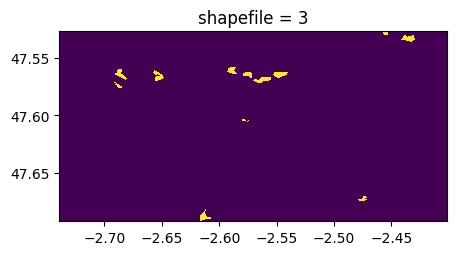

<Figure size 640x480 with 0 Axes>

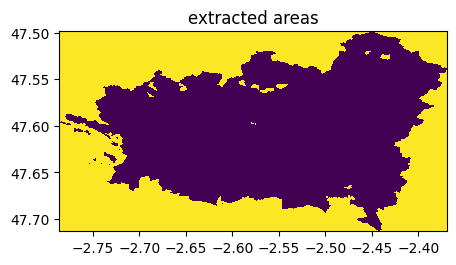

In [15]:
(rastereasy.shpfiles.shp2geoim(shapefile_path,resolution=im.resolution)==value).visu(title='shapefile = %d'%value)
if keep_size is True:
    ((ime-im)==0).visu(1,title='extracted areas')
else:
    ime,imc = rastereasy.extract_common_areas(ime,im,resolution=None)
    ((ime-imc)==0).visu(1,title='extracted areas')


#### 2) With modifying the  image

In [16]:
shp=rastereasy.shpfiles.shp2geoim(shapefile_path,resolution=3)


- Size of the image:
   - Rows (height): 2370
   - Cols (width): 3144
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60615500, -2.57780166)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4}


- Size of the image:
   - Rows (height): 2370
   - Cols (width): 3144
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60615500, -2.57780166)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630
- Nodata: 0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4}




<Figure size 640x480 with 0 Axes>

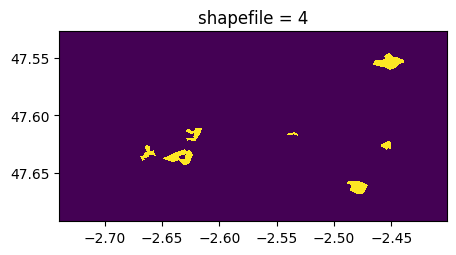

<Figure size 640x480 with 0 Axes>

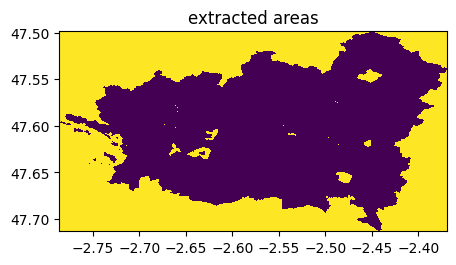

In [17]:
keep_size=True
value=4

#Read a stack
im=rastereasy.Geoimage('./data/demo/tostack/G5_B2.tif')
im.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B3.tif'),reformat_names=True, inplace=True)
im.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B4.tif'),reformat_names=True, inplace=True)
im.stack(rastereasy.Geoimage('./data/demo/tostack/G5_B8.tif'),reformat_names=True, inplace=True)
imoriginal=im.copy()
imoriginal.info()

im.extract_from_shapeimage(shp,value,keep_size=keep_size,inplace=True)
im.save('./data/results/shp2raster//extract4.tif')
im.info()
(shp==value).visu(title='shapefile = %d'%value)
if keep_size is True:
    ((imoriginal-im)==0).visu(1,title='extracted areas')
else:
    ime,imc = rastereasy.extract_common_areas(imoriginal,im,resolution=None)
    ((ime-imc)==0).visu(1,title='extracted areas')
